# Como instalar LabelImg para criação de rotulagem (Data Label)

### Abra uma outra aba no navegador e acesse o repositório do [labelImg](https://github.com/heartexlabs/labelImg)

Agora iremos criar um diretório no nosso espaço de trabalho, lá criaremos um diretório chamado imgs onde colocaremos as imagens que queremos rotular. Cabe salientar que se houver mais de uma classe que você deseja catalogar, é interessante e prudente criar subdiretórios na pasta imgs para não haver o risco misturar.

Agora o que devemos fazer é navegar até o diretório raiz do nosso projeto, abrir um terminal e clonar o repositório do labelimg

Após o clone ser efetuado iremos navegar ate a pasta do labelimg usando: ```cd labelImg```

Criaremos um arquivo chamado ```classes.txt```, onde definiremos os rótulos que iremos utilizar.

E aqui iremos instalar algumas dependencias necessárias para o projeto sendo elas o ```PyQt5```, ```lxml``` e a própria linguagem python é fundamental estar instalada 

pip install pyqt5

pip install lxml

pip install pyqt5-tools


Agora iremos executar o comando: ```pyrcc5 -o libs/resources.py resources.qrc```

Com isso podemos executar o projeto e setaremos algumas instruções

python labelImg.py <'diretório da pasta de imagens de destino'> <'arquivo de classes de rotulação'>

exemplo: 

python labelImg.py ../imgs/carros classes.txt

Após apertar Enter a ferramenta de rotulagem será aberta e lá conterá as classes que você definiu anteriormente para rotulagem

Você pode clicar em Create RectBox para selecionar a área desejada

### Importante!!!

Você deve definir o tipo de exportação que deseja. 
A ferramenta dispõe do tipo YOLO ou em XML

Caso opte por um tipo YOLO a exportação vem em um arquivo .txt, onde as coordenadas estão normalizadas

Caso opte por um tipo XML as coordenadas vem em um arquivo .xml onde há mais informações como, width e height, além das coordenadas já estarem em sua forma original

Lembre-se sempre de selecionar seu Bbox e salvar, após isto a ferramenta criará um arquivo de saída no formato/tipo que você definiu.

In [78]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import xml.etree.ElementTree as ET
import json

In [79]:
def parse_xml_to_json(path):
    tree = ET.parse(path)
    root = tree.getroot()
    size = root.find('size')
    
    content = {
        'width': int(size.find('width').text),
        'height': int(size.find('height').text),
        'bbox': []
    }

    for obj in root.findall('.//object'):
        bbox = obj.find('bndbox')
        xmin = int(bbox.find('xmin').text)
        ymin = int(bbox.find('ymin').text)
        xmax = int(bbox.find('xmax').text)
        ymax = int(bbox.find('ymax').text)

        content['bbox'].extend([xmin, ymin, xmax, ymax])

    return json.dumps(content) 


In [97]:
result_json1 = parse_xml_to_json('arquivo1.xml')
result_json2 = parse_xml_to_json('arquivo2.xml')

In [101]:
path1 = './img/shen-lol-league-of-legends.jpg'
path2 = 'img/Blood-Moon-Shen.jpg'

In [99]:
def plot_bbox_to_image(path, json_file):
    img = plt.imread(path)

    x_min, y_min, x_max, y_max = json.loads(json_file)['bbox']

    fig, ax = plt.subplots()
    ax.imshow(img)

    rect = patches.Rectangle((x_min, y_min), x_max, y_max, linewidth=2, edgecolor='yellow', facecolor='none')
    ax.add_patch(rect)

    ax.axis('off')
    plt.show()

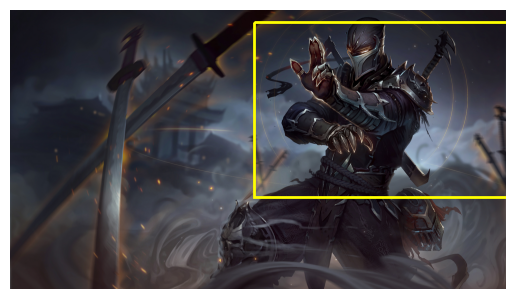

In [104]:
plot_bbox_to_image(path1, result_json1)

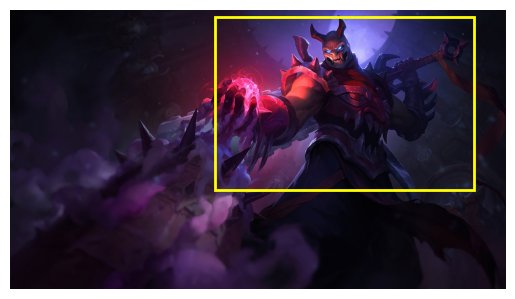

In [105]:
plot_bbox_to_image(path2, result_json2)